In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import sympy as sp

In [2]:
df = pd.read_csv("gender.csv")
df

,target,0,1,2,3,4,5,6,7,8,...,118,119,120,121,122,123,124,125,126,127
0,male,-0.066420,0.151611,0.027740,0.052771,-0.066105,-0.041232,-0.002637,-0.158467,0.130467,...,0.025989,-0.001087,0.027260,-0.046754,-0.118619,-0.163774,-0.000590,-0.076400,0.107497,0.001567
1,male,-0.030614,0.049667,0.008084,-0.050324,0.007649,-0.063818,-0.019530,-0.119905,0.186553,...,0.044229,-0.023900,-0.028108,0.040618,-0.146579,-0.141244,0.016162,0.017638,0.080610,-0.015930
2,male,-0.096178,0.061127,0.035326,-0.035388,-0.090728,-0.018634,-0.024315,-0.139786,0.052211,...,0.111141,0.059436,-0.029222,0.042115,-0.222173,-0.116908,0.093428,0.017391,0.057652,0.086116
3,male,-0.103057,0.085044,0.078333,-0.035873,-0.028163,0.004924,0.007829,-0.017016,0.114907,...,0.100793,-0.002644,-0.023388,0.029497,-0.139830,-0.119243,0.005306,-0.015100,0.161575,0.062462
4,male,-0.125815,0.120046,0.023131,-0.042901,0.038215,-0.049677,-0.054258,-0.130758,0.173457,...,0.090197,0.067527,0.039926,0.047469,-0.056852,-0.076700,0.004966,0.028171,0.026041,0.084135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,female,-0.164731,0.064301,0.058630,-0.017420,-0.157600,-0.022536,0.002864,-0.072739,0.030554,...,0.095115,0.007198,-0.004655,0.023957,-0.170753,-0.136630,0.041614,0.031600,0.019064,0.004384
796,female,-0.095308,0.051095,0.092913,-0.101745,-0.083153,-0.028159,0.009090,-0.114513,0.157421,...,0.056078,0.119846,0.087470,0.017481,-0.096594,-0.084553,0.037709,0.030732,-0.083713,0.064970
797,female,-0.202852,0.037039,0.079731,-0.047156,-0.140062,-0.080246,0.057668,-0.122083,0.165443,...,0.066954,0.035684,-0.023112,-0.030452,-0.154243,-0.188270,0.071086,0.037384,-0.006257,0.039977
798,female,-0.088300,0.063530,0.049627,-0.026011,-0.172773,0.086218,0.042710,-0.161852,0.185083,...,0.039460,0.067547,0.040426,0.028007,-0.154515,-0.127736,0.046967,0.009701,-0.016942,0.048071


In [3]:
X=df.drop('target',axis=1)
Y=df["target"]

In [4]:
new_df=X.join(pd.Series(Y,name='target'))
new_df

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,target
0,-0.066420,0.151611,0.027740,0.052771,-0.066105,-0.041232,-0.002637,-0.158467,0.130467,-0.044872,...,-0.001087,0.027260,-0.046754,-0.118619,-0.163774,-0.000590,-0.076400,0.107497,0.001567,male
1,-0.030614,0.049667,0.008084,-0.050324,0.007649,-0.063818,-0.019530,-0.119905,0.186553,-0.044821,...,-0.023900,-0.028108,0.040618,-0.146579,-0.141244,0.016162,0.017638,0.080610,-0.015930,male
2,-0.096178,0.061127,0.035326,-0.035388,-0.090728,-0.018634,-0.024315,-0.139786,0.052211,-0.052085,...,0.059436,-0.029222,0.042115,-0.222173,-0.116908,0.093428,0.017391,0.057652,0.086116,male
3,-0.103057,0.085044,0.078333,-0.035873,-0.028163,0.004924,0.007829,-0.017016,0.114907,-0.056267,...,-0.002644,-0.023388,0.029497,-0.139830,-0.119243,0.005306,-0.015100,0.161575,0.062462,male
4,-0.125815,0.120046,0.023131,-0.042901,0.038215,-0.049677,-0.054258,-0.130758,0.173457,-0.011889,...,0.067527,0.039926,0.047469,-0.056852,-0.076700,0.004966,0.028171,0.026041,0.084135,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,-0.164731,0.064301,0.058630,-0.017420,-0.157600,-0.022536,0.002864,-0.072739,0.030554,-0.121480,...,0.007198,-0.004655,0.023957,-0.170753,-0.136630,0.041614,0.031600,0.019064,0.004384,female
796,-0.095308,0.051095,0.092913,-0.101745,-0.083153,-0.028159,0.009090,-0.114513,0.157421,-0.069665,...,0.119846,0.087470,0.017481,-0.096594,-0.084553,0.037709,0.030732,-0.083713,0.064970,female
797,-0.202852,0.037039,0.079731,-0.047156,-0.140062,-0.080246,0.057668,-0.122083,0.165443,-0.104478,...,0.035684,-0.023112,-0.030452,-0.154243,-0.188270,0.071086,0.037384,-0.006257,0.039977,female
798,-0.088300,0.063530,0.049627,-0.026011,-0.172773,0.086218,0.042710,-0.161852,0.185083,-0.162894,...,0.067547,0.040426,0.028007,-0.154515,-0.127736,0.046967,0.009701,-0.016942,0.048071,female


In [5]:
class_feature_means = pd.DataFrame(columns=[])
for c, rows in new_df.groupby('target'):
    class_feature_means[c] = rows.mean()
class_feature_means

C:\Users\LakshmiSrinivas\AppData\Local\Temp\ipykernel_28064\2041652225.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  class_feature_means[c] = rows.mean()
C:\Users\LakshmiSrinivas\AppData\Local\Temp\ipykernel_28064\2041652225.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  class_feature_means[c] = rows.mean()


,female,male
0,-0.116533,-0.091511
1,0.076925,0.092729
2,0.082209,0.043432
3,-0.077203,-0.030228
4,-0.122895,-0.092672
...,...,...
123,-0.087258,-0.118241
124,0.053518,0.022285
125,-0.031080,-0.024801
126,0.003652,0.020277


In [6]:
within_class_scatter_matrix = np.zeros((128,128))
for c, rows in new_df.groupby('target'):
  rows = rows.drop(['target'], axis=1)
  s = np.zeros((128,128))
  for index, row in rows.iterrows():
    x, mc = row.values.reshape(128,1), class_feature_means[c].values.reshape(128,1)
    s += (x - mc).dot((x - mc).T)
  within_class_scatter_matrix += s

In [7]:
within_class_scatter_matrix

array([[ 2.2506239 , -0.36724384,  0.0211587 , ...,  0.32350867,
        -0.16354527, -0.10639707],
       [-0.36724384,  1.92093402,  0.16345657, ..., -0.32531367,
        -0.16256513, -0.05737371],
       [ 0.0211587 ,  0.16345657,  1.76240414, ..., -0.19711614,
        -0.03509416,  0.1269321 ],
       ...,
       [ 0.32350867, -0.32531367, -0.19711614, ...,  1.88580894,
        -0.01889887,  0.1052213 ],
       [-0.16354527, -0.16256513, -0.03509416, ..., -0.01889887,
         1.91424641, -0.01886765],
       [-0.10639707, -0.05737371,  0.1269321 , ...,  0.1052213 ,
        -0.01886765,  1.76875313]])

In [8]:
feature_means = new_df.mean()
between_class_scatter_matrix = np.zeros((128,128))
for c in class_feature_means:
  n = len(new_df.loc[new_df['target'] == c].index)
  mc, m = class_feature_means[c].values.reshape(128,1), feature_means.values.reshape(128,1)
  between_class_scatter_matrix += n * (mc - m).dot((mc - m).T)

C:\Users\LakshmiSrinivas\AppData\Local\Temp\ipykernel_28064\1223538656.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  feature_means = new_df.mean()


In [9]:
between_class_scatter_matrix

array([[ 0.12521753,  0.07909079, -0.19404923, ...,  0.03142468,
         0.08319473,  0.06715887],
       [ 0.07909079,  0.04995589, -0.12256676, ...,  0.01984868,
         0.05254805,  0.04241937],
       [-0.19404923, -0.12256676,  0.30071751, ..., -0.04869873,
        -0.12892662, -0.10407591],
       ...,
       [ 0.03142468,  0.01984868, -0.04869873, ...,  0.00788636,
         0.0208786 ,  0.01685424],
       [ 0.08319473,  0.05254805, -0.12892662, ...,  0.0208786 ,
         0.05527471,  0.04462046],
       [ 0.06715887,  0.04241937, -0.10407591, ...,  0.01685424,
         0.04462046,  0.03601983]])

In [10]:
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(between_class_scatter_matrix))

In [11]:
eigen_values

array([ 1.61636080e+01+0.00000000e+00j, -5.77814549e+00+0.00000000e+00j,
       -1.02641869e-04+1.20277715e-04j, -1.02641869e-04-1.20277715e-04j,
        5.08332504e-05+1.35455150e-04j,  5.08332504e-05-1.35455150e-04j,
       -1.21777162e-04+6.71241359e-05j, -1.21777162e-04-6.71241359e-05j,
        1.26367080e-04+5.23713105e-05j,  1.26367080e-04-5.23713105e-05j,
       -1.16848861e-04+2.98929940e-05j, -1.16848861e-04-2.98929940e-05j,
        1.16562192e-04+0.00000000e+00j, -1.37639565e-05+1.09068757e-04j,
       -1.37639565e-05-1.09068757e-04j,  7.91660602e-05+7.70512948e-05j,
        7.91660602e-05-7.70512948e-05j, -6.29719283e-05+7.90229817e-05j,
       -6.29719283e-05-7.90229817e-05j, -4.83898291e-05+8.82571943e-05j,
       -4.83898291e-05-8.82571943e-05j,  3.90604124e-05+9.52888669e-05j,
        3.90604124e-05-9.52888669e-05j,  5.33771332e-05+8.77099917e-05j,
        5.33771332e-05-8.77099917e-05j,  9.21383829e-05+2.98968819e-05j,
        9.21383829e-05-2.98968819e-05j,  4.03336432

In [12]:
eigen_vectors

array([[-0.09755169+0.j        ,  0.09754997+0.j        ,
         0.0049284 +0.00226293j, ...,  0.01630537+0.00781736j,
        -0.01974145-0.00182876j, -0.01974145+0.00182876j],
       [-0.13016986+0.j        ,  0.13017391+0.j        ,
        -0.14200135-0.04458843j, ...,  0.00753521-0.0013802j ,
         0.017523  -0.02953003j,  0.017523  +0.02953003j],
       [ 0.05205509+0.j        , -0.05205777+0.j        ,
         0.09307137+0.01298233j, ...,  0.0138139 -0.00055848j,
        -0.02847414+0.01263636j, -0.02847414-0.01263636j],
       ...,
       [-0.13780352+0.j        ,  0.13780173+0.j        ,
        -0.07866392+0.01924003j, ..., -0.02397961-0.01743817j,
        -0.03349092+0.04531712j, -0.03349092-0.04531712j],
       [ 0.12639122+0.j        , -0.1263865 +0.j        ,
        -0.09781408+0.0047285j , ...,  0.00474145-0.01441165j,
         0.03661941-0.02018833j,  0.03661941+0.02018833j],
       [-0.0521849 +0.j        ,  0.05218517+0.j        ,
        -0.01584555+0.0337341j

In [13]:
pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)
for pair in pairs:
    print(pair[0])

16.163607956871893
5.778145487619625
0.00015812046623366104
0.00015812046623366104
0.0001446793589469983
0.0001446793589469983
0.00013905152537364846
0.00013905152537364846
0.00013678959390307533
0.00013678959390307533
0.00012061197042297599
0.00012061197042297599
0.00011656219160393245
0.00011047247223759589
0.00011047247223759589
0.00010993379974044949
0.00010993379974044949
0.00010298390150175051
0.00010298390150175051
0.0001026750261703178
0.0001026750261703178
0.00010104501669921797
0.00010104501669921797
0.00010065241135095632
0.00010065241135095632
9.686746176191146e-05
9.686746176191146e-05
9.399943679796534e-05
9.399943679796534e-05
8.997349600074452e-05
8.997349600074452e-05
8.949185111047946e-05
8.932937700707974e-05
8.932937700707974e-05
8.794332225854213e-05
8.794332225854213e-05
8.533040107692789e-05
8.533040107692789e-05
7.824017378034012e-05
7.786240510636183e-05
7.786240510636183e-05
7.646310543399608e-05
7.646310543399608e-05
7.258074050320186e-05
7.258074050320186e-0

In [14]:
eigen_value_sums = sum(eigen_values)
print('Explained Variance')
for i, pair in enumerate(pairs):
    print('Eigenvector {}: {}'.format(i, (pair[0]/eigen_value_sums).real))

Explained Variance
Eigenvector 0: 1.5563816237744355
Eigenvector 1: 0.5563732726271069
Eigenvector 2: 1.5225300480273622e-05
Eigenvector 3: 1.5225300480273622e-05
Eigenvector 4: 1.3931066393431105e-05
Eigenvector 5: 1.3931066393431105e-05
Eigenvector 6: 1.338916654170285e-05
Eigenvector 7: 1.338916654170285e-05
Eigenvector 8: 1.317136686576228e-05
Eigenvector 9: 1.317136686576228e-05
Eigenvector 10: 1.161363569782314e-05
Eigenvector 11: 1.161363569782314e-05
Eigenvector 12: 1.1223685548628225e-05
Eigenvector 13: 1.0637311062127518e-05
Eigenvector 14: 1.0637311062127518e-05
Eigenvector 15: 1.0585442693504104e-05
Eigenvector 16: 1.0585442693504104e-05
Eigenvector 17: 9.916242231906994e-06
Eigenvector 18: 9.916242231906994e-06
Eigenvector 19: 9.886500859116847e-06
Eigenvector 20: 9.886500859116847e-06
Eigenvector 21: 9.729548476074204e-06
Eigenvector 22: 9.729548476074204e-06
Eigenvector 23: 9.691744803091019e-06
Eigenvector 24: 9.691744803091019e-06
Eigenvector 25: 9.327294860787292e-06


In [15]:
w_matrix = np.hstack((pairs[0][1].reshape(128,1), pairs[1][1].reshape(128,1))).real
w_matrix

array([[-0.09755169,  0.09754997],
       [-0.13016986,  0.13017391],
       [ 0.05205509, -0.05205777],
       [ 0.12120412, -0.12120394],
       [-0.1602135 ,  0.16021713],
       [ 0.08008988, -0.0800909 ],
       [-0.18275901,  0.18275612],
       [-0.04348174,  0.04348224],
       [ 0.03060211, -0.03059999],
       [-0.02156641,  0.0215699 ],
       [-0.097094  ,  0.09709182],
       [-0.02997368,  0.02998019],
       [-0.09431776,  0.09431979],
       [-0.14678151,  0.14677786],
       [ 0.10978146, -0.10978216],
       [-0.09646204,  0.09645611],
       [-0.11613444,  0.11613461],
       [ 0.12417126, -0.12416497],
       [-0.06922586,  0.06922473],
       [ 0.12593591, -0.12593259],
       [ 0.02467225, -0.02467318],
       [ 0.06160378, -0.06160551],
       [ 0.09140876, -0.09141172],
       [-0.07936145,  0.07936614],
       [ 0.04176454, -0.04176391],
       [ 0.0776456 , -0.07764621],
       [ 0.00312693, -0.00313206],
       [ 0.09405091, -0.09404496],
       [ 0.09576898,

In [16]:
X_lda=np.array(X.dot(w_matrix))
X_lda
frame=pd.DataFrame(X_lda)
frame

,0,1
0,-4.783895e-07,-0.000009
1,-4.333700e-07,-0.000009
2,-2.311353e-07,-0.000008
3,-7.466226e-07,-0.000009
4,-1.528586e-08,-0.000008
...,...,...
795,-2.381933e-06,-0.000009
796,-3.199948e-06,-0.000010
797,-2.900557e-06,-0.000010
798,-3.508041e-06,-0.000011


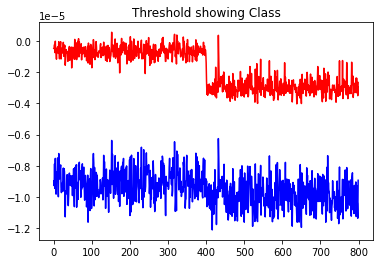

In [17]:
ay=[]
ay.append(frame[0])
ay.append(frame[1])
zero=np.zeros(800)
plt.plot(ay[0],c='red')
plt.plot(ay[1],c='blue')
plt.title('Threshold showing Class');

In [18]:
label=LabelEncoder()
y=label.fit_transform(new_df['target'])
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

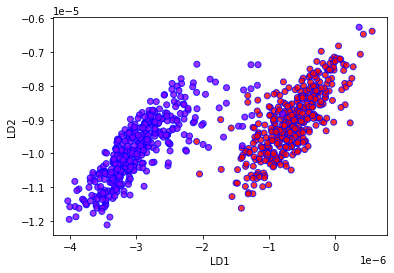

In [19]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(X_lda[:,0],X_lda[:,1],c=y,cmap='rainbow',alpha=0.8,edgecolors='b');

## **BAYES Classifier**

In [20]:
types = df.iloc[:, 0].unique()
test_df = pd.DataFrame()
train_df = pd.DataFrame()
for t in types:
    type_df = df[df.iloc[:, 0] == t]
    train_df = pd.concat([train_df, type_df.iloc[10:]])
    test_df = pd.concat([test_df, type_df.iloc[:10]])

In [21]:
class BayesClassifier:
    def __init__(self):
        pass

    def fit(self, X_train, y_train):
        self.classes, self.class_counts = np.unique(y_train, return_counts=True)
        self.no_of_classes = len(self.classes)
        self.total_data_points = len(y_train)
        self.apriori_probabilities = self.class_counts/self.total_data_points
        self.class_split_training_data = {}
        for c in self.classes:
            self.class_split_training_data[c] = []
            for j in range(len(y_train)):
                if c == y_train[j]:
                    self.class_split_training_data[c].append(X_train[j])
            self.class_split_training_data[c] = np.array(self.class_split_training_data[c])
        self.mean_vectors = []
        for c in self.classes:
            self.mean_vectors.append(np.mean(self.class_split_training_data[c], axis = 0))
        self.covariance_matrices = []
        for c in self.classes:
            self.covariance_matrices.append(np.cov(self.class_split_training_data[c], rowvar=False))
        self.inverse_covariance_matrices = []
        for c in range(len(self.classes)):
            self.inverse_covariance_matrices.append(np.linalg.inv(self.covariance_matrices[c]))
        self.dimensions = len(X_train[0])
        self.det_covariance_matrices = []
        for c in range(len(self.classes)):
            self.det_covariance_matrices.append(sp.Matrix(self.covariance_matrices[c]).det())

    def predict(self, X_test):
        y_pred = []
        for X in X_test:
            probability_values = {}
            class_count = 0
            for c in self.classes:
                p_xw = np.exp(-0.5 * np.dot(np.dot((X - self.mean_vectors[class_count]).T, self.inverse_covariance_matrices[class_count]), (X - self.mean_vectors[class_count]))) / (((2 * np.pi) ** (self.dimensions / 2)) * np.power(self.det_covariance_matrices[c], 0.5))
                p_wx = p_xw * self.apriori_probabilities[class_count]
                probability_values[c] = p_wx
                class_count += 1
            y_pred.append(max(probability_values, key=probability_values.get))
        y_pred = np.array(y_pred)
        return y_pred

In [22]:
X_train = train_df.iloc[:, 1:].values
X_test = test_df.iloc[:, 1:].values
y_train = train_df.iloc[:, 0].values
y_test = test_df.iloc[:, 0].values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_train = le.fit_transform(y_train)
Y_test = le.fit_transform(y_test)
bc = BayesClassifier()
bc.fit(X_train, Y_train)

In [23]:
y_pred_before = bc.predict(X_test)

In [35]:
type(X_train)

numpy.ndarray

In [24]:
conf_matrix=confusion_matrix(Y_test, y_pred_before)
conf_matrix

array([[8, 2],
       [1, 9]], dtype=int64)

In [25]:
from sklearn.metrics import accuracy_score
print("Accuracy  : ",accuracy_score(Y_test,y_pred_before)*100)
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
prec=TP/TP+FP
print("Precision : ",prec)
rec=TP/TP+FN
print("Recall    : ",rec)
f1=2*(prec)*(rec)/(prec+rec)
print("F1 Score  : ",f1)

Accuracy  :  85.0
Precision :  3.0
Recall    :  2.0
F1 Score  :  2.4


<AxesSubplot:>

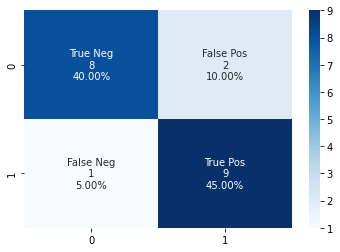

In [26]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                conf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

## **Decision Tree Classifier on LDA reduced Data**

In [27]:
X_te= pd.DataFrame()
X_t = pd.DataFrame()
X_t = pd.concat([X_t, frame.iloc[10:400]])
X_te = pd.concat([X_te, frame.iloc[:10]])
X_t = pd.concat([X_t, frame.iloc[410:]])
X_te= pd.concat([X_te, frame.iloc[400:410]])

In [28]:
X_train = X_t.iloc[:, 0:].values
X_test = X_te.iloc[:, 0:].values


In [29]:

bc = BayesClassifier()
bc.fit(X_train, Y_train)


In [30]:
Y_pred = bc.predict(X_test)

In [31]:

cf_matrix=confusion_matrix(Y_test, Y_pred)
cf_matrix

array([[ 9,  1],
       [ 0, 10]], dtype=int64)

In [32]:
from sklearn.metrics import accuracy_score
print("Accuracy  : ",accuracy_score(Y_test,Y_pred)*100)
FP = cf_matrix[0][1]
FN = cf_matrix[1][0]
TP = cf_matrix[1][1]
TN = cf_matrix[0][0]
prec=TP/TP+FP
print("Precision : ",prec)
rec=TP/TP+FN
print("Recall    : ",rec)
f1=2*(prec)*(rec)/(prec+rec)
print("F1 Score  : ",f1)

Accuracy  :  95.0
Precision :  2.0
Recall    :  1.0
F1 Score  :  1.3333333333333333


<AxesSubplot:>

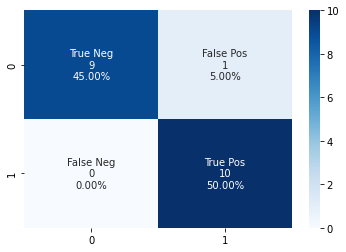

In [33]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')